**Elaborado por:** Jhoan Camilo Eusse Duque

In [22]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram
import numpy as np
sim = Aer.get_backend('aer_simulator')

# Algoritmo de Deutsch

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$


Si $f(x)$ es una función que arroja como posible resultado $0$ ó $1$ y recibe como entrada a $x$ que a su vez solo puede tomar dos valores $0$ ó $1$, entonces bajo estas condiciones solo existen 4 posibles funciones $f(x)$ como vemos en la siguiente tabla sacada de la referencia [1]:

![alt text](funcion.png "Title")

A las funciones $f_1(x)$ y $f_2(x)$ se les denomina cosnstantes, ya que independiente del valor de $x$ van a arrojar un mismo resultado. Mientras que a las funciones $f_3(x)$ y $f_4(x)$ se les denomina balanceadas ya que para diferentes valores de $x$ la función toma diferentes valores.

La idea del algoritmo de Deutsch es determinar en una sola llamada de este si la función es constante o balanceada, superenado al algoritmo clásico que le toma dos llamadas determinar si la función es constante o balanceada.

El algoritmo de Deutsch se puede ver en la siguiente figura tomada de la referencia [1]:

![alt text](algorithm.png "Title")

(Al qubit etiquetado como 1 se le denomina registro y al qubit etiquetado como 2 objetivo. A la compuerta $U_f$ se le denomina oráculo).

Tenemos un estado global inicial  $\ket{\psi_1}=\ket{0}_1 \otimes \ket{1}_2 $ que después de pasarlo por el circuito de Deutsch según la referencia[1] obtenemos:

**Estados globales después de pasar por el oráculo:**

![alt text](estado_deutsch.png "Title")

**Estados globales finales:**

![alt text](estado_deutsch_2.png "Title")

De lo anterior notamos que si la funcion es constante ($f_1(x)$ y $f_2(x)$) la probabilidad de medir el qubit uno (llamado también registro) en el estado $\ket{0}$ es de 1 para un circuito cuántico ideal, mientras que para una función balanceada ($f_3(x)$ y $f_4(x)$ ) la probabilidad de medir en el registro el estado $\ket{1}$ es de 1 para un circuito cuántico ideal.

La idea ahora es verificar esta conclusión usando la librería Qiskit. Lo primero que vamos a hacer eso construir los oráculos $U_f$ adecuados.

Para la función $f_1(x)$ podemos notar que el estado ántes y después del oráculo es el mismo, por tanto en un circuito cuántico esta compuerta se puede programar no haciendo nada sobre las entradas del oráculo.

In [23]:
def U_f1(qc):
    
    return qc

Para la función $f_2(x)$ tenemos que el oráculo lo único que hace es introducir una fase global de $-1$ lo que podemos replicar en el circuito pasando el segundo qubit por una compuerta $X$ como se puede ver en el siguiente desarrollo:

$$\ket{\psi_3}=\left (\frac{\ket{0}_1+\ket{1}_1}{\sqrt{2}} \right ) \otimes \hat{X}\left ( \frac{\ket{0}_2-\ket{1}_2}{\sqrt{2}} \right ) $$

$$\ket{\psi_3}=\left (\frac{\ket{0}_1+\ket{1}_1}{\sqrt{2}} \right ) \otimes \left ( \frac{\hat{X}\ket{0}_2-\hat{X}\ket{1}_2}{\sqrt{2}} \right ) $$

$$\ket{\psi_3}=\left (\frac{\ket{0}_1+\ket{1}_1}{\sqrt{2}} \right ) \otimes \left ( \frac{\ket{1}_2-\ket{0}_2}{\sqrt{2}} \right ) $$

$$\ket{\psi_3}=\left (\frac{\ket{0}_1+\ket{1}_1}{\sqrt{2}} \right ) \otimes -\left ( \frac{\ket{0}_2-\ket{1}_2}{\sqrt{2}} \right ) $$

$$\ket{\psi_3}=-\left (\frac{\ket{0}_1+\ket{1}_1}{\sqrt{2}} \right ) \otimes \left ( \frac{\ket{0}_2-\ket{1}_2}{\sqrt{2}} \right ) $$

La implementación de esa compuerta con Qiskit sería: 

In [24]:
def U_f2(qc):
    
    qc.x(1) #Compuerta X al segundo qubit
    
    return qc

Antes de continuar es importante notar que según la notación de Qiskit, lo que hemos llamado pirmer qubit basados en la referencia [1] equivale al qubit 0 en qiskit y el segundo qubit equivale al qubit 1 en qiskit.
 
Para la función $f_3(x)$ tenemos que el oráculo rota en $\frac{\pi}{2}$ el estado del primer qubit, esto se puede lograr usando una compuerta $\hat{CNOT}$ entre el primer y segundo qubit como se puede verificar:

$$\ket{\psi_3}=  \hat{CNOT} \ket{\psi_2}= \hat{CNOT} \left (\frac{\ket{0}_1+\ket{1}_1}{\sqrt{2}} \right ) \otimes \left ( \frac{\ket{0}_2-\ket{1}_2}{\sqrt{2}} \right ) $$

$$\ket{\psi_3}= \hat{CNOT} \frac{1}{2}\left(\ket{0}_1 \otimes \ket{0 }_2 -\ket{0}_1 \otimes \ket{1 }_2 +\ket{1}_1 \otimes \ket{0}_2-\ket{1}_1 \otimes \ket{1}_2 \right)$$

$$\ket{\psi_3}= \frac{1}{2}\left(\ket{0}_1 \otimes \ket{0 }_2 -\ket{0}_1 \otimes \ket{1 }_2 +\ket{1}_1 \otimes \ket{1}_2-\ket{1}_1 \otimes \ket{0}_2 \right)$$

$$\ket{\psi_3}= \left (\frac{\ket{0}_1-\ket{1}_1}{\sqrt{2}} \right ) \otimes \left ( \frac{\ket{0}_2-\ket{1}_2}{\sqrt{2}} \right ) $$

Implementado en qiskit:

In [25]:
def U_f3(qc):
    
    qc.cx(0,1) #Compuerta CNOT entre primer y segundo quibit (el primero es el que controla)
    return qc

 Para la función $f_4(x)$ tenemos que el oráculo rota en $\frac{\pi}{2}$ el estado del qubit cero y además induce una fase global de $-1$ al estado final, como es fácil de notar observando los dos desarrollos anteriores, esto se puede lograr usando una compuerta $CNOT$ entre los qubits, seguido de una compuerta $X$ en el segundo qubit  
 
 En qiskit:

In [26]:
def U_f4(qc):   
    
    qc.cx(0,1) #Compuerta CNOT entre primer y segundo quibit (el primero es el que controla)
    qc.x(1) #Compuerta X al segundo qubit
    
    return qc

Finalmente, construimos una función de python para el algoritmo de Deutsch que recibe como argumento el óraculo $U_f$ que se va a a implementar y retorna el circuito completo

In [27]:
def Deutsch(U_f):
    
    qc=QuantumCircuit(2,1) #Se crea un circuito cuántico con 2 bits cuánticos y 1 canal clásico
    qc.x(1) #Compuerta X al segundo qubit (inicializar estado |1>)
    qc.h(0) #Compuerta H al primer qubit
    qc.h(1) #Compuerta H al segundo qubit
    qc.barrier() #Barrera (empieza oráculo)
    qc = U_f(qc) #Agregamos el oráculo
    qc.barrier() #Barrera (termina oráculo)
    qc.h(0) #Compuerta H al primer qubit
    qc.measure(0,0) #Medimos el primer qubit y enviamos señal al canal clásico

    return qc

Con las funciones del agoritmo de Deutsch y los oráculos definidos podemos pasar a verificar los resultados vistos en la ecuación 17.25 de la referencia [1].

Para el oráculo de la función constante $f_1(x)$ tenemos el circuito:

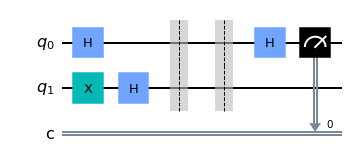

In [28]:
qc=Deutsch(U_f1) # definición circuito con oráculo usando f_1(x)
display(qc.draw()) # visualización del circuito

Haciendo uso del simulador de circuitos cuánticos Aer, podemos ejecutar el circuito varias veces y representar los resultados de las medidas en un histograma

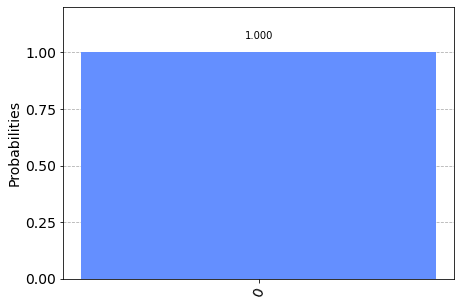

In [29]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

Como lo esperabamos para la función $f_1(x)$ obtenemos que la probabilidad de medir el estado $\ket{0}$ en el registro es de $1$ ya que es una función constante. Es importante resaltar que la idea de correr varias veces el circuito se debe a que un dispositivo cuántico real tiene cierta aleatoriedad inherente en sus resultados, sin embargo, como estamos trabajando con un simulador se obtiene el resultado con probabilidad $1$.

Para la función constante $f_2(x)$ tenemos el circuito:

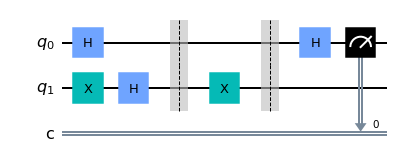

In [30]:
qc=Deutsch(U_f2) #definición circuito con oráculo usando f_2(x)
display(qc.draw()) # visualización del circuito

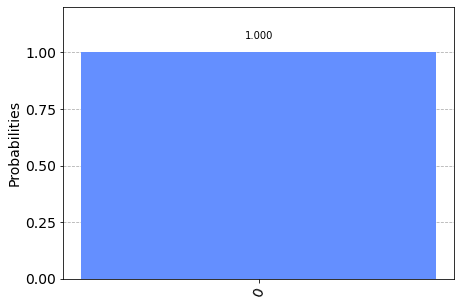

In [31]:
counts = sim.run(qc).result().get_counts() #contando las medidas del simulador cuántico   
plot_histogram(counts) #histrograma de resultados

Nuevamente como la función es balanceada se obtiene en el registro una medida con probabilidad $1$ para el estado $\ket{0}$.

Ahora usando el oráculo para la función balanceada $f_3(x)$:

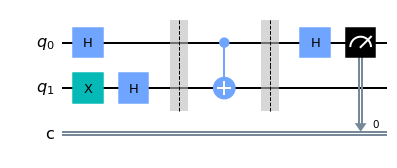

In [32]:
qc=Deutsch(U_f3) #definición circuito con oráculo usando f_3(x)
display(qc.draw()) # visualización del circuito

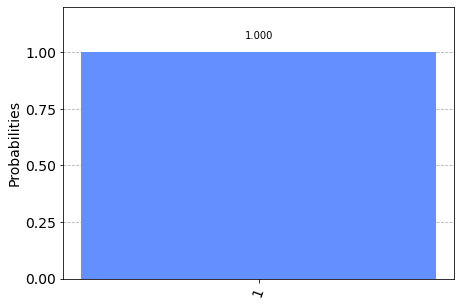

In [33]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

Como lo esperabamos para la función $f_3(x)$ obtenemos que la probabilidad de medir el estado $\ket{1}$ en el registro es de $1$ ya que es balanceada.

Finalemnte para el oráculo con la función $f_4(x)$

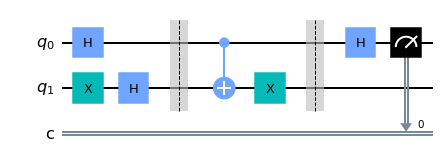

In [34]:
qc=Deutsch(U_f4) #definición circuito con oráculo usando f_4(x)
display(qc.draw()) # visualización del circuito

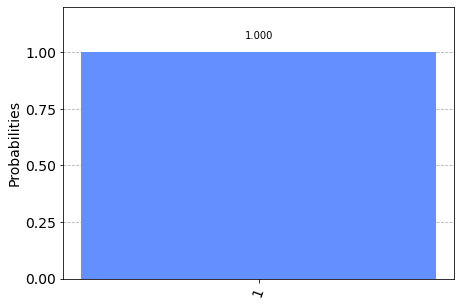

In [35]:
counts = sim.run(qc).result().get_counts()  #contando las medidas de simulador cuántico
plot_histogram(counts) #histrograma de resultados

Obtenemos nuevamente que la probabilidad de medir el estado $\ket{1}$ en el registro es de $1$

Así podemos concluir que usando Qiskit el algoritmo de Deutsch funciona y la conclusión extraida de la ecuación 17.25 es adecuada. 

# Algoritmo de Deutsch-Josza 

El algoritmo de Deutsch-Josza es una generalización del alorimto de Deutsch, cuyo objetivo es determinar si una función de n entradas $f(x_1,x_2,...,x_n)$ es constante o balanceada y hacerlo en una solo consulta al oráculo en contraposición a un algoritmo clásico que le tomaría en el peor de los casos $2^n/2 +1$ consultas al oráculo para determinar con certeza si la función es constante o balanceada. El algoritmo de Deutsch-Josza se puede implementar como el circuito que se muestra en la figura sacada de la referncia [2]:

![alt text](deutsch-josza.png "Title")

Donde el símbolo $ / ^n $ significa que tenemos n qubits en el registro en lugar de 1, en este caso tenemos un estado inicial 

$$\ket{\psi_0}=\ket{0}^{\otimes n} \ket{1}$$

donde $\ket{0}^{\otimes n}$ es el producto tensorial de n estados $\ket{0}$ del registro. Siguiendo el desarrollo matemático de la referenica [2] se llega a que el estado global final después de pasar el estado inicial por todo el circuito es el siguiente:

$$ \ket{\psi_3}=\sum_z \sum_x \frac{(-1)^{x \cdot z + f(x)}\ket{z}}{2^n} \left ( \frac{\ket{0}-\ket{1}}{\sqrt{2}} \right )$$

donde $ x \cdot z = x_1 z_1 \oplus x_2 z_2 \oplus ... x_n z_n $ y también  $z=z_1,...,z_n$

Vemos que la amplitud del estado $\ket{\psi_0}=\ket{0}^{\otimes n}$ en el registro es $\frac{1}{2^n} \sum_x (-1)^{f(x)}$ ya que $ x \cdot z = x_1 0 \oplus x_2 0 \oplus ... x_n 0$ y por tanto $x \cdot z= 0 \oplus 0 \oplus ... \oplus 0 = 0 $, así, la porbabilidad de medir el estado está dada por $ \left | \frac{1}{2^n} \sum_x (-1)^{f(x)} \right | ^2 $ 

Si tenemos el caso en que $f(x)$ sea una función constante la sumatoria nos dara $2^n$ o $-2^n$ y por tanto la probabilidad de medir este estado en el registro será de $ \left | \frac{1}{2^n} 2^n \right | ^2 $  que es igual a 1 y los demás estados tendran probabilidad nula (debio a que $\ket{\psi_3}$ es un estado con norma $1$). Para el caso en que $f(x)$ sea balanceada $ \left | \frac{1}{2^n} \sum_x (-1)^{f(x)} \right | ^2 $ se anulará porque en la serie la mitad de los terminos seran $-1$ y la otra mitad $+1$ por tanto la porbabilidad de obtener una medición del estado $\ket{0}^{\otimes n}$ en el registro es de cero; así, pueden haber estados diferentes a este con probabilidad de ser medidos diferente de 0.

Así, finalmente podemos concluir que una función $f(x_1,x_2,...,x_n)$ es constante, sí y solo sí, aplicando el algoritmo de Deutsch-Josza obtenemos una medida con probabilidad igual a $1$ en el registro para el estado $\ket{0}^{\otimes n}$ con un computador cuántico ideal. Lo anterior con una sola llamada del oráculo. (*)

Vamos a verificar en qiskit la afirmación anterior.

De manera análoga al algoritmo de Deutsch si una función $f(x)$ es constante el oráculo $U_f$ para el caso de Deutsch-Josza o no le hace nada al estado global que entra al oráculo o le induce una fase global de $-1$. Para tener en cuenta los dos casos en el circuito se crea un oráculo para una función constante el cual aleatoriamente no haga nada o aplique una compuerta $X$ en el objetivo para inducir la fase global. Al final, la probabilidad para cualquiera de los casos debe ser la misma ya que solo difieren en una fase global.

Lo implementamos en qiskit de la siguiente manera

In [36]:
#oráculo para f(x) constante para un número n de bits en el registro
def constant(qc,n):
    
    ran=np.random.randint(2) #selección aleatoria de 0 ó 1
    if ran == 1: 
        qc.x(n) #si el número aleatorio es 1 se pone compuerta X en el objetivo (se induce fase global -1 al registro)
        
    return qc

Una manera de implementar un oráculo para una función $f(x)$ balanceada en un circuito es aplicar una compuerta CNOT de cada qubit en el registro con el quibit del objetivo. Además, como también en algunos casos se puede tener una fase global de $-1$ en el qubit del registro después de pasar por el oráculo; así, se puede aplicar o no una compuerta $X$ al objetivo.

Lo implementamos de la siguiente manera:

In [37]:
#oráculo para f(x) balanceado para un número n de bits en el registro
def balanced(qc,n):
    
    for i in range(n):
        qc.cx(i,n) #se crea una CNOT entre cada qubit del registro y el objetivo (los qubits del registro controlan)
    ran=np.random.randint(2) #selección aleatoria de 0 ó 1
    if ran == 1:
        qc.x(n) #si el número aleatorio es 1 se pone compuerta X en el objetivo (se induce fase global -1 al registro)
    
    return qc

Finalmente, construimos una función de python para el algoritmo de Deutsch-Josza que recibe como argumento el óraculo $U_f$ que se va a a implementar y el número de bits del registro. Retorna el circuito completo.

In [38]:
def D_J(U_f,n):
    
    qc=QuantumCircuit(n+1,n) #Se crea un circuito cuántico con n+1 quibits y n canales clásicos
    qc.x(n) #Compuerta X al bit del registro
    for i in range(n+1):
        qc.h(i) #Compuerta H a todos los bits 
    qc.barrier() #Barrera (empieza oráculo)
    qc = U_f(qc,n) #Agregamos el oráculo
    qc.barrier() #Barrera (termina oráculo)
    for i in range(n):
        qc.h(i)  #Compuerta H a los n bits del registro
        qc.measure(i,i) #Medición los n bits del registro
        
    return qc   

Verifiquemos el resultado de las medidas para un oráculo con una $f(x)$ constante y 3 qubits en el registro: 

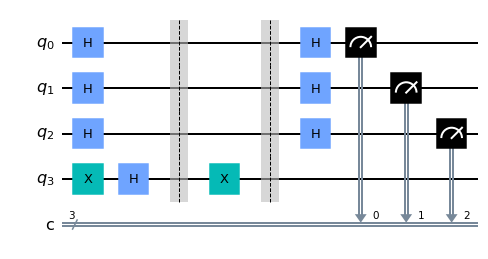

In [39]:
qc=D_J(constant,3) #definición circuito con oráculo constante y 3 bits en registro
display(qc.draw()) #ver circuito

Miremos el histograma con los resultados de las medidas:

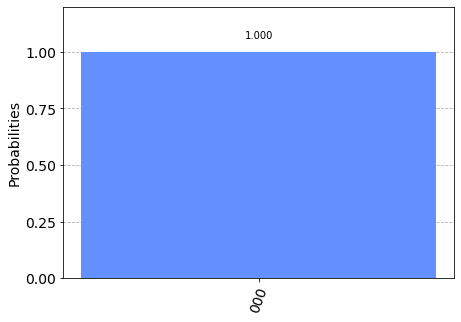

In [40]:
counts = sim.run(qc).result().get_counts() #contando las medidas de simulador cuántico     
plot_histogram(counts) #histrograma de resultados

Verificamos que si la función $f(x)$ es constante, el estado $\ket{0}^{\otimes n}$ en el registro con n=3 es medido con una probabilida de 1. Se puede cambiar los valores de n en la función _D_J_ y verificar que se cumple para cualquier valor de n (computacionalmente empieza a ser muy costoso simular estados de muchos qubits por tanto no es muy recomendable poner valores de n mayores a 10) 

Verifiquemos el resultado de las medidas para un oráculo con una $f(x)$ constante y 3 qubits en el registro: 

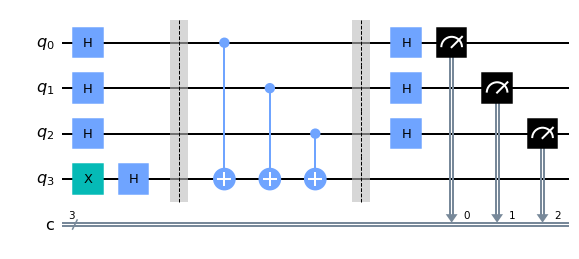

In [41]:
qc=D_J(balanced,3)
display(qc.draw())

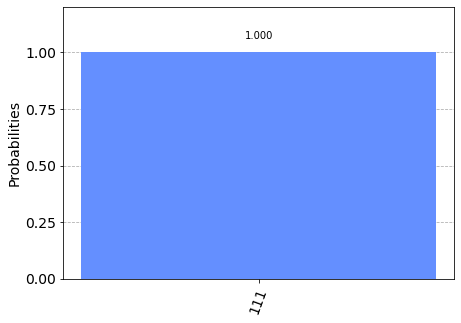

In [42]:
counts = sim.run(qc).result().get_counts()  
plot_histogram(counts)

Como lo esperabamos para una $f(x)$ balanceada la medición del estado $\ket{0}^{\otimes n}$ en el registro con n=3 es igual a cero.

Por lo que verificamos con qiskit la afirmación (*)

# Referencias

[1] Beck M. -Quantum Mechanics Theory and Experiment-Oxford University Press (2012).

[2] Nielsen M., Chuang I. - Quantum Computation and Quantum Information 10th Anniversary Edition-Cambridge University Press (2011).

